<a href="https://colab.research.google.com/github/camdsDS/Cesar_Portfolio/blob/main/Porto_Seguro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt

In [ ]:
# Evita avisos desnecessários para a apresentação ficar limpa
import warnings
warnings.filterwarnings('ignore')

# Funções

In [ ]:
def relatorio(data, target):
    '''
    Devolve um relatorio sobre valores miss no df, valor da bad rate,
    tipos de dados e correlação de Pearson     
    '''
    #Relatorio de miss
    df_miss = ((data.isna().sum()/len(data))*100).to_frame().reset_index().rename(columns={'index': 'column', 0:'%_miss'}).sort_values('%_miss', ascending = False)
    if df_miss['%_miss'].tolist()[0] == 0:
        print('O df não apresenta valores miss.')
    else:
        print('O df apresenta valores miss e as cinco colunas com maior concentração de miss são:')
        print(df_miss.head())
        
    bad_rate = data[target].value_counts()[1]/(data[target].value_counts()[0]+data[target].value_counts()[1])
    print(f'\nBad_rate (razão entre quantidade de 1 no target e o total (0 e 1) de valores no target: {bad_rate:.2f}')

    p0 = (data[target].value_counts()[0]/(data[target].value_counts()[0]+data[target].value_counts()[1]))*100
    p1 = bad_rate*100
    objects = ('0', '1')
    y_pos = [0,1]
    performance = [p0,p1]

    plt.bar(y_pos, performance, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('%')
    plt.title('Comparando as proporções de 0 e 1 do target')

    plt.show()

    #Correlação de Pearson
    corr_matrix = data.corr()
    corr_matrix = corr_matrix['target'].to_frame().reset_index().rename(columns={'index': 'coluna', 'target':'correlacao'}).sort_values('correlacao', ascending = False)
    print('Correlacao de Pearson: (5 primeiras linhas)')
    print(corr_matrix.head())

In [ ]:
def RelatorioMiss(df):
    '''
    Retorna a % de miss de cada coluna do df
    '''
    df_miss = ((df.isna().sum()/len(df))*100).to_frame().rename(columns={0:'P_miss'}).reset_index().sort_values('P_miss', ascending = False)
    return df_miss

In [ ]:
def unique_df(df,x):
    '''
    Função para ver, se houver, x elementos únicos de cada coluna de um df
    '''    
    rows = np.arange(x).tolist()
    unique = pd.DataFrame(rows,columns={"index"})
    for i in df.columns:
        u = df[i].unique()
        a = pd.DataFrame(u,columns=[i])
        try:
            a.sort_values(i,inplace=True)
        except:
            a = a
        unique=unique.merge(a,how="left",left_index=True,right_index=True)
    unique.fillna("",inplace=True)
    unique.drop("index",axis=1,inplace=True)
    return unique

In [ ]:
def normalizacao(df):
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler()
    scaler.fit(df)

    abt = pd.DataFrame(scaler.transform(df), columns = df.columns)
    abt.index = df.index
    return abt

In [ ]:
def testa_modelos(X_desenv, y_desenv):
    '''
    Testa LogisticRegression, GradientBoosting e RandomForest
    e retorna aquele que performar melhor com o df
    '''
    from sklearn.linear_model import LogisticRegression
    from sklearn.ensemble import GradientBoostingClassifier
    from sklearn.ensemble import RandomForestClassifier

    LR = LogisticRegression()
    GB = GradientBoostingClassifier()
    RF = RandomForestClassifier()

    #testando os modelos
    from sklearn.model_selection import cross_validate

    teste_modelLR = cross_validate(estimator=LR, X=X_desenv, y=y_desenv)
    teste_modelGB = cross_validate(estimator=GB, X=X_desenv, y=y_desenv)
    teste_modelRF = cross_validate(estimator=RF, X=X_desenv, y=y_desenv)

    resultado = [[teste_modelLR['test_score'].mean(), teste_modelGB['test_score'].mean(), teste_modelRF['test_score'].mean()]]
    resultado = pd.DataFrame(resultado)
    resultado = resultado.rename(index={0:'test_score_mean'}, columns={0:'LogisticRegression', 1:'GradientBoostingC', 2:'RandomForestC'})
    print(resultado)
    for i in range(len(resultado.columns)):
        if  resultado.iloc[0,i] == max(resultado.iloc[0]):
            best = i
    
    if resultado.columns[best] == 'LogisticRegression':
        best_model = LR
    elif resultado.columns[best] == 'GradientBoostingC':
        best_model = GB
    elif resultado.columns[best] == 'RandomForestC':
        best_model = RF

    print(f'\nO melhor modelo eh: {resultado.columns[best]}')
    return best_model

# Dados (importação e tratamento da base de treino)

**Data Description**

In this competition, you will predict the probability that an auto insurance policy holder files a claim.

In the train and test data, features that belong to similar groupings are tagged as such in the feature names (e.g., ind, reg, car, calc). In addition, feature names include the postfix bin to indicate binary features and cat to indicate categorical features. Features without these designations are either continuous or ordinal. Values of -1 indicate that the feature was missing from the observation. The target columns signifies whether or not a claim was filed for that policy holder.

In [ ]:
data = pd.read_csv(r'/content/drive/MyDrive/Data science/Machine Learning/kaggle/Porto Seguro/train.csv', na_values=-1)
data.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2.0,5,1.0,0.0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10.0,1.0,NaN,0,1.0,4,1.0,0,0.0,1,12,2.0,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1.0,7,0.0,0.0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11.0,1.0,NaN,0,NaN,11,1.0,1,2.0,1,19,3.0,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4.0,9,1.0,0.0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,NaN,7.0,1.0,NaN,0,NaN,14,1.0,1,2.0,1,60,1.0,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1.0,2,0.0,0.0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7.0,1.0,0.0,0,1.0,11,1.0,1,3.0,1,104,1.0,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2.0,0,1.0,0.0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11.0,1.0,NaN,0,NaN,14,1.0,1,2.0,1,82,3.0,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0


## Relatório dos dados disponíveis

O df apresenta valores miss e as cinco colunas com maior concentração de miss são:
           column     %_miss
25  ps_car_03_cat  69.089837
27  ps_car_05_cat  44.782531
22      ps_reg_03  18.106490
37      ps_car_14   7.160474
29  ps_car_07_cat   1.930237

Bad_rate (razão entre quantidade de 1 no target e o total (0 e 1) de valores no target: 0.04


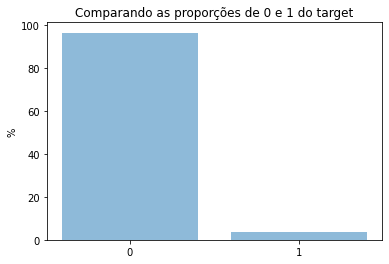

Correlacao de Pearson: (5 primeiras linhas)
           coluna  correlacao
1          target    1.000000
36      ps_car_13    0.053899
35      ps_car_12    0.038800
18  ps_ind_17_bin    0.037053
21      ps_reg_02    0.034800


In [ ]:
relatorio(data, 'target')

## Definindo alvo e os df de treino, que são: df binário, df categórico de alta cardinalidade, df categórico de baixa cardinalidade e df numérico

In [ ]:
data_train = data.copy()

y = data_train['target']
data_train = data_train.drop(['id','target'], axis=1)

### df categórico de alta cardinalidade e baixa cardinalidade

In [ ]:
lista_colunas_cat = []
for column in data_train.columns:
    temp = column.split('_')
    for i in temp:
        if i == 'cat':
            lista_colunas_cat.append(column)

unique_df(data_train[lista_colunas_cat],10)

,ps_ind_02_cat,ps_ind_04_cat,ps_ind_05_cat,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat
0,2,1,0,10.0,1,,0,1,4,1,0,0,1,12
1,1,0,1,11.0,0,0,1,,11,,1,2,0,19
2,4,,4,7.0,,1,8,0,14,0,,3,2,60
3,3,,3,6.0,,,9,,13,,,1,,104
4,,,6,9.0,,,2,,6,,,,,82
5,,,5,5.0,,,6,,15,,,4,,99
6,,,,4.0,,,3,,3,,,,,30
7,,,2,8.0,,,7,,0,,,,,68
8,,,,3.0,,,4,,1,,,,,20
9,,,,0.0,,,5,,10,,,,,36


In [ ]:
df_categoricoAltaC = data_train[['ps_car_01_cat', 'ps_car_04_cat', 'ps_car_06_cat', 'ps_car_11_cat']]
df_categoricoBaixaC = data_train[['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_05_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat']]

### df binário

In [ ]:
lista_colunas_binarios = []
for column in data_train.columns:
    temp = column.split('_')
    for i in temp:
        if i == 'bin':
            lista_colunas_binarios.append(column)

df_binario = data_train[lista_colunas_binarios]

### df numérico

In [ ]:
df_numerico = data_train.drop(lista_colunas_binarios, axis=1)
df_numerico = df_numerico.drop(lista_colunas_cat, axis=1)

#### verificando se nenhuma coluna ficou de fora de alguma df

In [ ]:
a = len(df_binario.columns)
b = len(df_categoricoAltaC.columns)
c = len(df_categoricoBaixaC.columns)
d = len(df_numerico.columns)
total = len(data_train.columns)

total == a + b + c + d

True

## Tratando os dataframes

### binário

In [ ]:
RelatorioMiss(df_binario).head()

,index,P_miss
0,ps_ind_06_bin,0.0
9,ps_ind_17_bin,0.0
15,ps_calc_19_bin,0.0
14,ps_calc_18_bin,0.0
13,ps_calc_17_bin,0.0


### Categórico de alta cardinalidade



In [ ]:
RelatorioMiss(df_categoricoAltaC).head()

,index,P_miss
0,ps_car_01_cat,0.017977
1,ps_car_04_cat,0.000000
2,ps_car_06_cat,0.000000
3,ps_car_11_cat,0.000000


In [ ]:
df_categoricoAltaC = df_categoricoAltaC.fillna('Miss')

In [ ]:
for column in df_categoricoAltaC.columns:
    df_categoricoAltaC[column] = df_categoricoAltaC[column].apply(lambda x: str(x) +'_categorico')

In [ ]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

df_categoricoAltaC_encodado = df_categoricoAltaC.copy()

for column in df_categoricoAltaC.columns:
    df_categoricoAltaC_encodado[column] = LE.fit_transform(df_categoricoAltaC_encodado[column])

### Categórico de baixa cardinalidade

In [ ]:
RelatorioMiss(df_categoricoBaixaC).head()

,index,P_miss
4,ps_car_03_cat,69.089837
5,ps_car_05_cat,44.782531
6,ps_car_07_cat,1.930237
2,ps_ind_05_cat,0.975955
8,ps_car_09_cat,0.095596


In [ ]:
for column in df_categoricoBaixaC.columns:
    df_categoricoBaixaC[column] = df_categoricoBaixaC[column].apply(lambda x: str(x) +'_categorico')

In [ ]:
df_categoricoBaixaC_dummy = pd.get_dummies(df_categoricoBaixaC, dummy_na = False, drop_first=True)

### Numérico

In [ ]:
RelatorioMiss(df_numerico).head()

,index,P_miss
6,ps_reg_03,18.106490
10,ps_car_14,7.160474
7,ps_car_11,0.000840
8,ps_car_12,0.000168
0,ps_ind_01,0.000000


In [ ]:
from sklearn.impute import SimpleImputer

imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(df_numerico)
df_numerico_tratado = pd.DataFrame(imp_mean.transform(df_numerico), columns=df_numerico.columns)
df_numerico_tratado.index = df_numerico.index

## Juntando os df

In [ ]:
#df2 = df_categoricoBaixaC_dummy + df_binario
#df3 = df_categoricoAltaC_encodado + df_numerico_tratado
#df4 = df2 + df3

df2 = pd.merge(df_categoricoBaixaC_dummy, df_binario, how='left', left_index= True, right_index= True)
df3 = pd.merge(df_categoricoAltaC_encodado, df_numerico_tratado, how= 'left', left_index= True, right_index= True)
df4 = pd.merge(df2, df3, how= 'left', left_index= True, right_index= True)

## Normalização dos dados

In [ ]:
abt_train = normalizacao(df4)

#### Testando modelos

In [ ]:
from sklearn.model_selection import train_test_split

X_desenv, X_valid, y_desenv, y_valid = train_test_split(abt_train, y, train_size = 70, test_size = 30, random_state = 42)

best_model = testa_modelos(X_desenv, y_desenv)

                 LogisticRegression  GradientBoostingC  RandomForestC
test_score_mean            0.942857                0.9       0.942857

O melhor modelo eh: RandomForestC


#### Calibrando o melhor modelo

In [ ]:
model = best_model

parametros = {'n_estimators':[50, 100, 125, 150],
              'max_depth':[1, 2, 3] }

from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(estimator = model,        
                    param_grid = parametros,  
                    cv = 5)  

# Treinando o grid.
grid.fit(X_desenv, y_desenv)

best_params = grid.best_params_

# Imprimindo as colunas de interesse do resultado.
print('Colunas de interesse do resultado:')
print(pd.DataFrame(grid.cv_results_)[['params','rank_test_score','mean_test_score']].sort_values('mean_test_score', ascending = False))
print('\nOs melhores parametros sao: ')
print(best_params)

Colunas de interesse do resultado:
                                   params  rank_test_score  mean_test_score
0    {'max_depth': 1, 'n_estimators': 50}                1         0.942857
1   {'max_depth': 1, 'n_estimators': 100}                1         0.942857
2   {'max_depth': 1, 'n_estimators': 125}                1         0.942857
3   {'max_depth': 1, 'n_estimators': 150}                1         0.942857
4    {'max_depth': 2, 'n_estimators': 50}                1         0.942857
5   {'max_depth': 2, 'n_estimators': 100}                1         0.942857
6   {'max_depth': 2, 'n_estimators': 125}                1         0.942857
7   {'max_depth': 2, 'n_estimators': 150}                1         0.942857
8    {'max_depth': 3, 'n_estimators': 50}                1         0.942857
9   {'max_depth': 3, 'n_estimators': 100}                1         0.942857
10  {'max_depth': 3, 'n_estimators': 125}                1         0.942857
11  {'max_depth': 3, 'n_estimators': 150}            

#### Importância das variáveis

In [ ]:
grad = grid.best_estimator_
grad.fit(abt_train,y)
grad.feature_importances_
var_e_imp = pd.DataFrame({'Variaveis':abt_train.columns.tolist(), 'Importancia':grad.feature_importances_.tolist()}).sort_values('Importancia', ascending=False).reset_index(drop=True)
var_e_imp

,Variaveis,Importancia
0,ps_car_13,0.12
1,ps_ind_17_bin,0.10
2,ps_ind_07_bin,0.10
3,ps_car_07_cat_1.0_categorico,0.10
4,ps_car_02_cat_1.0_categorico,0.08
...,...,...
71,ps_ind_02_cat_3.0_categorico,0.00
72,ps_ind_18_bin,0.00
73,ps_calc_15_bin,0.00
74,ps_calc_16_bin,0.00


#### Avaliando se o modelo está overfitado

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

roc_score_desenv = roc_auc_score(y_desenv, grid.predict_proba(X_desenv)[:,1])
roc_score_valid = roc_auc_score(y_valid, grid.predict_proba(X_valid)[:,1])
print('roc_score_desenv:', roc_score_desenv)
print('roc_score_valid:', roc_score_valid)
#A diferenca é aceitável. O modelo não está overfitado

roc_score_desenv: 0.40340909090909094
roc_score_valid: 0.7321428571428572


# Base de teste

In [ ]:
data2 = pd.read_csv(r'/content/drive/MyDrive/Data science/Machine Learning/kaggle/Porto Seguro/test.csv', na_values=-1)
data_test = data2.copy()

In [ ]:
data_test = data_test.drop(['id'], axis=1)

df_test_categoricoAltaC = data_test[['ps_car_01_cat', 'ps_car_04_cat', 'ps_car_06_cat', 'ps_car_11_cat']]
df_test_categoricoBaixaC = data_test[['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_05_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat']]
df_test_binario = data_test[lista_colunas_binarios]

df_test_numerico = data_test.drop(lista_colunas_binarios, axis=1)
df_test_numerico = df_test_numerico.drop(lista_colunas_cat, axis=1)

In [ ]:
a_test = len(df_test_binario.columns)
b_test = len(df_test_categoricoAltaC.columns)
c_test = len(df_test_categoricoBaixaC.columns)
d_test = len(df_test_numerico.columns)
total_test = len(data_test.columns)

total_test == a + b + c + d

True

In [ ]:
df_test_categoricoAltaC = df_test_categoricoAltaC.fillna('Miss')

for column in df_test_categoricoAltaC.columns:
    df_test_categoricoAltaC[column] = df_test_categoricoAltaC[column].apply(lambda x: str(x) +'_categorico')

LE = LabelEncoder()

df_test_categoricoAltaC_encodado = df_test_categoricoAltaC.copy()

for column in df_test_categoricoAltaC.columns:
    df_test_categoricoAltaC_encodado[column] = LE.fit_transform(df_test_categoricoAltaC_encodado[column])

In [ ]:
for column in df_test_categoricoBaixaC.columns:
    df_test_categoricoBaixaC[column] = df_test_categoricoBaixaC[column].apply(lambda x: str(x) +'_categorico')

df_test_categoricoBaixaC_dummy = pd.get_dummies(df_test_categoricoBaixaC, dummy_na = False, drop_first=True)

In [ ]:
imp_mean_test = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean_test.fit(df_numerico)
df_test_numerico_tratado = pd.DataFrame(imp_mean.transform(df_test_numerico), columns=df_test_numerico.columns)
df_test_numerico_tratado.index = df_test_numerico.index

In [ ]:
#df2_test = df_categoricoBaixaC_dummy + df_binario
#df3_test = df_categoricoAltaC_encodado + df_numerico_tratado
#df4_test = df2 + df3

df2_test = pd.merge(df_test_categoricoBaixaC_dummy, df_test_binario, how='left', left_index= True, right_index= True)
df3_test = pd.merge(df_test_categoricoAltaC_encodado, df_test_numerico_tratado, how= 'left', left_index= True, right_index= True)
df4_test = pd.merge(df2_test, df3_test, how= 'left', left_index= True, right_index= True)

In [ ]:
abt_test = normalizacao(df4_test)

In [ ]:
pred_test = grid.predict_proba(abt_test)[:,1]

output = pd.DataFrame({'id': data_test['id'], 'target': pred_test})
output.to_csv('Submission_PortoSeguro3.csv', index=False)